# DESHORS Victor, Ecole Polytechnique. May 2024

# Yule Process - Computing Rare Events

- Let $\lambda > 0$ be a parameter.
- Starting from an individual, we are interested in the evolution of a population where:
  - Each individual lives for a random amount of time following an exponential distribution with parameter $\lambda$ (independently of other individuals).
  - An individual dies by giving birth to two new individuals.
  - Individuals reproduce at a rate $\lambda$.
  
- Let $Y_t$ denote the number of individuals present at time $t$:
  - $Y_0 = 0$ (no individuals at the start).
  - $Y_t$ increases by 1 every time an individual dies.
  
- The process $\left(Y_t\right)_{t \geq 0}$ is called a Yule process with parameter $\lambda$.

- For an integer $C \geq 1$, we define:
  - $Y_t(C)$ as the number of individuals present at time $t$ when starting with $C$ individuals at $t=0$.
  - Thus, $Y_t = Y_t(1)$ when starting with one individual.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numba
import scipy.stats as sps
import scipy
from time import perf_counter, sleep
from scipy.special import comb
import src.individual as individual

import warnings
warnings.filterwarnings('ignore')

# MODELING

(A) In practice, it may be useful to construct the Yule process starting from an individual as follows. Consider a sequence of independent random variables $\left(E_{i}: i \geq 1\right)$ such that $E_{i}$ follows an exponential distribution with parameter $\lambda i$ for all $i \geq 1$. Then the process $\left(X_{t}\right)_{t \geq 0}$ defined by

$$
X_{t}=1+\inf \left\{k \geq 0: \sum_{i=1}^{k} E_{i} \geq t\right\}
$$

is a Yule process with parameter $\lambda$ (i.e., $\left(X_{t}\right)_{t \geq 0}$ and $\left(Y_{t}\right)_{t \geq 0}$ have the same distribution). In this representation, $E_{i}$ is the time of the $i$-th death. This comes from the memoryless property of the exponential distribution, and the fact that the minimum of independent exponential random variables with respective parameters $\lambda_{1}, \lambda_{2}, \ldots, \lambda_{n}$ is an exponential random variable with parameter $\lambda_{1} + \lambda_{2} + \cdots + \lambda_{n}$.

In [4]:
### Simulation of Y_t using Method (A): returns the first k such that time > t

@numba.njit()
def Y_t_1(t, lambda_, Y_0):
    """Simulation of Y_t using Method A) starting from Y_0: returns the first k such that time > t
    """
    time = 0
    k = Y_0
    while time < t:
        time += np.random.exponential(1 / (lambda_ * k))
        if time < t:
            k += 1
    return k

@numba.njit()
def simulation_Y_t_1(t_final, lambda_, Y_0):
    """Display: Yule process starting from Y_0 until we exceed a fixed final time t_final.
    """
    time = 0 # jump time of the process
    Y_t = Y_0
    time_list = [0]
    population = [0] 
    while time < t_final:
        Y_t += 1
        time += np.random.exponential(1 / (lambda_ * Y_t))
        time_list.append(time)
        population.append(Y_t)  
    return time_list, population

def plot_Y_t_1(t_final, lambda_list):
    """Display: Display the Yule process Y_t starting from Y_0 = 1 until the fixed t_final.
    """
    for lambda_ in lambda_list:
        time_list, population = simulation_Y_t_1(t_final, lambda_, 1)
        # plt.step(time_list, population, where='post') 
        plt.step(time_list, population, marker = 'o', linestyle = '--', markersize = 5, where='post', label ="lambda = " + str(lambda_))
    
    plt.xlabel("Time t")
    plt.ylabel("Y_t")
    plt.title("Yule Process Y_t until t = " + str(t_final))
    plt.legend()
    plt.grid()
    title = plt.gca().get_title()
    
    plt.show()

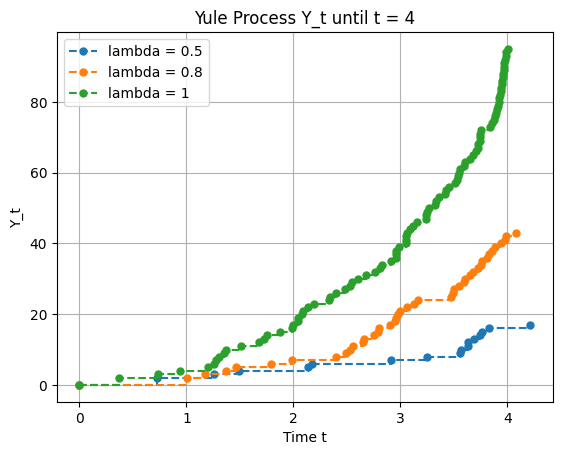

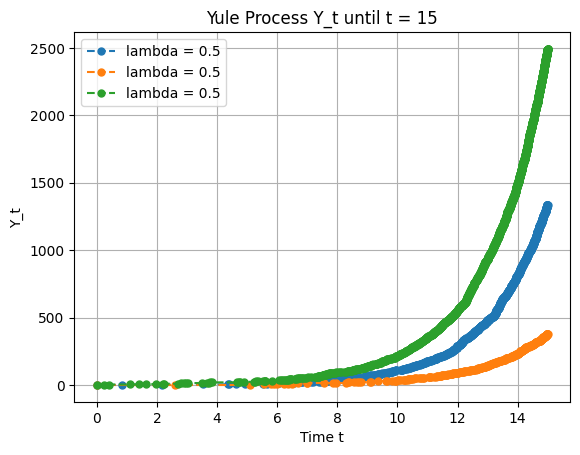

In [5]:
# TEST 1
t_final = 4
lambda_list = [0.5, 0.8, 1]
plot_Y_t_1(t_final, lambda_list)

# TEST 2 
t_final = 15
lambda_list = [0.5, 0.5, 0.5]
plot_Y_t_1(t_final, lambda_list)

- The expectation of a random variable $X$ following an exponential distribution with parameter $\lambda$ is given by:

$$ 
\mathbb{E}[X] = \frac{1}{\lambda} 
$$

- So when $\lambda$ is small, each individual takes about $ \frac{1}{\lambda} $ (which is very large) time to die and give birth to two new individuals. This means the population increases very slowly.

- When $\lambda$ is large, each individual takes about $ \frac{1}{\lambda} $ (which is very small) time to die and give birth to two new individuals. This means the population increases very rapidly.

- The genealogical display method allows for a clear and intuitive representation of the structure and relationships between events. This can be particularly useful for understanding the dependencies and interactions between different events over time.

- By tracing the lineages of events (similar to a family tree), one can better analyze individual trajectories and the branching of events. This facilitates the study of propagation phenomena, such as the diffusion of information or population growth.


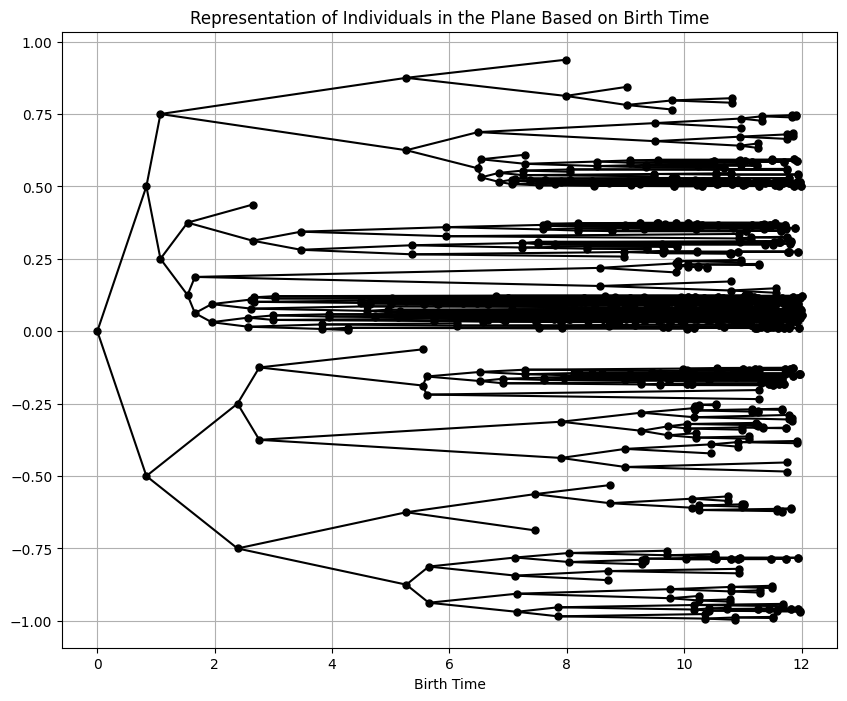

In [6]:
# Simulation parameters
t_final = 12  # Final time of the simulation
lambda_ = 0.5  # Global lambda parameter

population = individual.simulate_population_tree(t_final, lambda_)
individual.plot_population_tree(population)

(B) For any fixed $t>0$, $Y_{t}$ follows a geometric distribution with parameter $e^{-\lambda t}$, meaning that $P\left(Y_{t}=k\right)=e^{-\lambda t}\left(1-e^{-\lambda t}\right)^{k-1}$ for $k \geq 1$.

In [7]:
### Simulation of the distribution of Y_t for fixed t: Geometric distribution

@numba.njit()
def Y_t_2(t, lambda_):
    """
    Simulation of the distribution of Y_t for fixed t: Geometric distribution (for k >= 1) with parameter np.exp(-lambda_ * t)
    """
    return np.random.geometric(np.exp(-lambda_ * t))

def plot_Y_t_2(t, lambda_, k_start, k_end):
    """k_start >= 1. Display the distribution of Y_t for fixed t = t and lambda = lambda_. Convention: Initially, there is one individual.
    """
    # Geometric distribution with parameter np.exp(-lambda_*t)
    p = np.exp(-lambda_*t)
    X = np.arange(k_start, k_end)
    Y = p * (1 - p)**(X - 1)

    plt.bar(X, Y, width=0.5)
    plt.xlabel("k")
    plt.ylabel("P(Y_t = k)")
    plt.ylim(0, 0.5)
    plt.title("Distribution of Y_t at fixed t = " + str(t) + " for lambda = " + str(lambda_))
    plt.show()

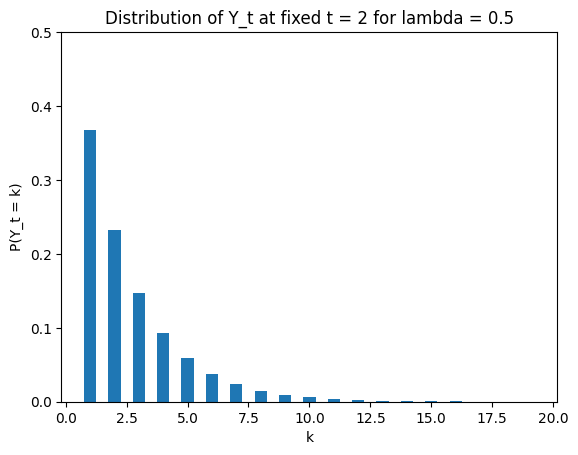

In [8]:
# parameters
t = 2
lambda_ = 0.5
k_start = 1
k_end = 20

plot_Y_t_2(t, lambda_, k_start, k_end)

(E) It may be useful to simulate a Yule process with a fixed terminal value. More precisely, let $E$ be an exponential random variable with parameter 1, and let $\left(P_{t}\right)_{t \geq 0}$ be an independent homogeneous Poisson process with parameter 1. Then the process $\left(Z_{t}\right)_{t \geq 0}$ defined by

$$
Z_{t}=1+P_{E\left(e^{\lambda t-1}\right)}
$$

is a Yule process with parameter $\lambda$ and terminal value $E$.

In [9]:
### Backward Simulation ###

def yule_backward_process(lambda_, t, N):
    """Calculation of N backward processes:
    Simulate the number of Poisson events up to t for N processes
    """
    Y_t = np.zeros(N)
    for i in range(N):
        eps = np.random.exponential(1, 1)
        T = eps * (np.exp(lambda_ * t) - 1)
        N_t = np.random.poisson(T, 1)
        Y_t[i] = N_t + 1  # Adjust to match the original logic
    return Y_t


def display_backward_process(lambda_, t, N):
    Y_t = yule_backward_process(lambda_, t, N)
    # Convert Y_t to integers
    Y_t = Y_t.astype(int)
    # Display the distribution of Y_t
    counts = np.bincount(Y_t)
    M = np.max(Y_t)
    plt.bar(np.arange(M + 1), counts / N, width=0.5, label="Simulation")
    
    # Display the theoretical distribution of Y_t: geometric distribution with parameter np.exp(-lambda_*t) for k >= 1
    p = np.exp(-lambda_ * t)
    X = np.arange(1, M + 1)
    Y = p * (1 - p)**(X - 1)
    plt.plot(X, Y, color='red', label="Theoretical Distribution: Geometric with parameter np.exp(-lambda_*t)")
    
    plt.xlabel("k")
    plt.ylabel("P(Y_t = k)")
    plt.title("Distribution of Y_t for lambda = " + str(lambda_) + ", t = " + str(t) + " and N = " + str(N))
    plt.legend()
    plt.show()

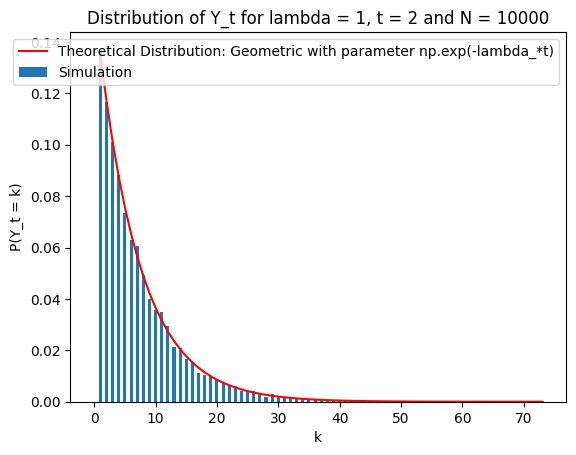

In [10]:
# parameters
lambda_ = 1
t = 2
N = 10_000

display_backward_process(lambda_, t, N)

Since a Poisson process is equivalent to itself, we observe the following form for the distribution of $Y_t$:

$$
Y_t = \epsilon \left( \exp(-\lambda t) - 1 \right)
$$

This confirms that the distribution of $Y_t$ behaves as expected.


In [11]:
####### Creation of a Yule Process for a fixed value Y_t = k that returns the first arrival time to k -> continuous distribution

def yule_simulation(k, lambda_, N):
    """Calculates N simulations of the Yule process for a fixed value Y_t = k that returns the first arrival time to k -> continuous distribution
    """
    T = np.zeros(N)
    t = np.zeros(N)
    eps = np.zeros(N)
    
    for i in range(N):
        eps[i] = np.random.exponential(1, 1)
        # Find t such that P_T = k - 1 for the Poisson process P_T with parameter 1
        T_current = 0
        count = 0
        while count < k - 1:
            T_current += np.random.exponential(1, 1)
            count += 1
        
        T[i] = T_current
        # t = np.log(T / eps + 1) / lambda_
        t[i] = np.log(T_current / eps[i] + 1) / lambda_
        
    return T, t, eps


def display_yule(k, lambda_, N):  # display the continuous distribution of t
    T, t, eps = yule_simulation(k, lambda_, N)
    plt.hist(t, bins='auto', density=True)
    plt.xlabel("t")
    plt.ylabel("P(t = t)")
    plt.title("Distribution of t for Y_t = " + str(k) + " and lambda = " + str(lambda_))
    plt.show()

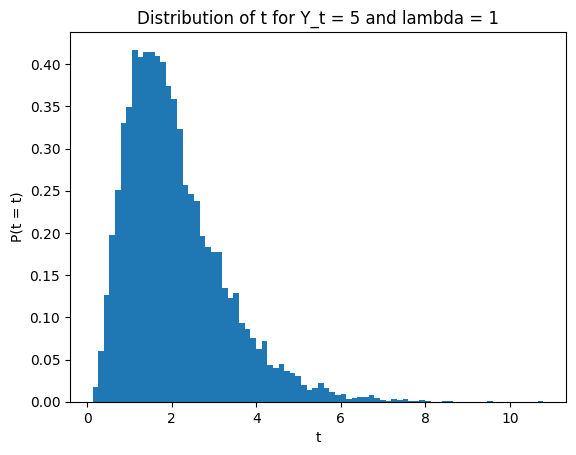

In [12]:
# parameters
k = 5
lambda_ = 1
N = 10_000

display_yule(k, lambda_, N)

## 1. COMPUTATION OF $ P(Y_t > A) $ USING NAÏVE MONTE CARLO


The theoretical probability of $P(Y_t < A | Y_0 = 1)$ is calculated using the following formula:

$$
P(Y_t < A | Y_0 = 1) = \sum_{k=1}^{A-1} e^{-\lambda t} \left(1 - e^{-\lambda t}\right)^{k-1}
$$

Similarly:

$$
P(Y_t > A | Y_0 = 1) = 1 - P(Y_t < A | Y_0 = 1) - e^{-\lambda t} \left(1 - e^{-\lambda t}\right)^{A-1}
$$


In [13]:
def theoretical_probability_less_than_A(lambda_, t, A):
    """ Theoretical calculation of P(Y_t < A | Y_0 = 1) using (B). """
    theoretical_probability = 0
    for k in range(1, A):
        theoretical_probability += np.exp(-lambda_*t) * (1 - np.exp(-lambda_*t))**(k - 1)
    return theoretical_probability

def theoretical_probability_greater_than_A(t, A, lambda_):
    """ Calculation of P(Y_t > A | Y_0 = 1) using (B). """
    probability = 1 - theoretical_probability_less_than_A(lambda_, t, A)
    probability -= np.exp(-lambda_*t) * (1 - np.exp(-lambda_*t))**(A - 1)
    return probability

@numba.njit()
def Monte_Carlo_Y_t_greater_than_A(t, A, lam, N):
    cnt_greater_than_A = 0
    for _ in range(N):
        Y_t = Y_t_2(t, lam)
        if Y_t > A:
            cnt_greater_than_A += 1
            
    probability = cnt_greater_than_A / N
    std = np.sqrt(probability * (1 - probability) / N)
    confidence_interval = (probability - 1.96 * std, probability + 1.96 * std)
    return probability, confidence_interval

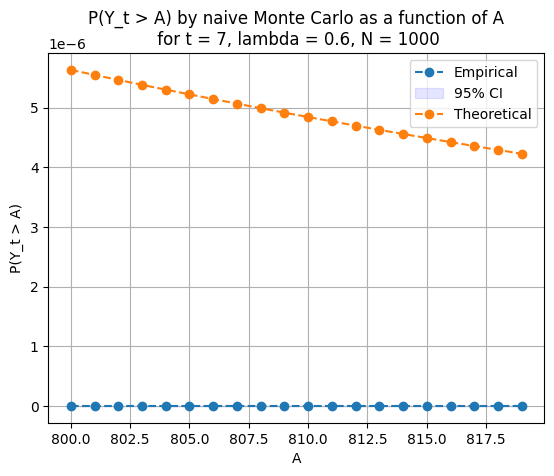

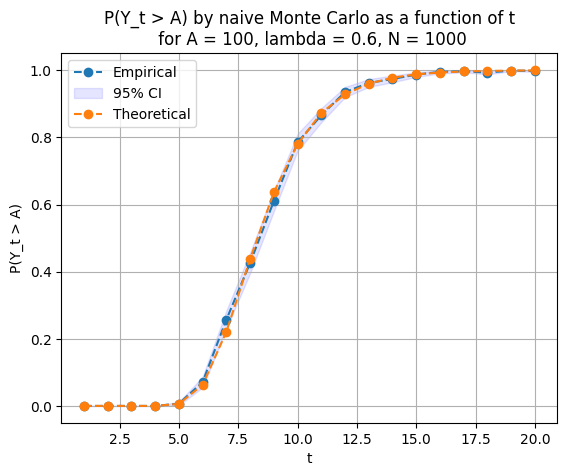

In [14]:
import src.Naive_Monte_Carlo as Naive_Monte_Carlo

###  Plot probability Y_t > A as a function of A
t = 7
lambda_ = 0.6
N = 1000
A_list = np.arange(800, 820)

Naive_Monte_Carlo.plot_probability_Y_t_greater_than_A_A(t, lambda_, N, A_list)

###  Plot probability Y_t > A as a function of t
lambda_ = 0.6
N = 1000
A = 100
t_max = 20

Naive_Monte_Carlo.plot_probability_Y_t_greater_than_A_t(lambda_, N, A, t_max)

## 2. IMPORTANCE SAMPLING FOR COMPUTING $ P(Y_t > A) $ VIA CHANGE OF VARIABLES (C)


- (C) Let $C \geq 1$ be an integer. Define $F(n)=\sum_{i=1}^{n} \ln \left(\frac{i+C}{i}\right)$ and $L_{t}=e^{F\left(Y_{t-1}\right)-\lambda C t}$. Then $E\left[L_{t}\right]=1$ for all $t \geq 0$. This allows defining a new probability measure $Q$, and under $Q$, this new process has the same distribution as $\left(Y_{t}(C+1)-C\right)_{t \geq 0}$. In other words, for any positive function $g$, 
$$
E_{P}\left[g\left(Y_{t}\right)\right]=E_{Q}\left[g\left(Y_{t}\right) \cdot \frac{1}{L_{t}}\right]=E_{P}\left[g\left(Y_{t}(C+1)-C\right) \cdot \frac{1}{e^{F\left(Y_{t}(C+1)-C-1\right)-\lambda C t}}\right].
$$

### Explanation of the Choice of $C$

We aim to find a heuristic for the value of $C$ that allows us to obtain an event that occurs frequently but not excessively. For instance, we can refer to the law of $Y_t$: increasing the initial population size effectively performs a "time shift," which can help us choose $C$ based on the distribution of $Y_t$.

When the values of $C$ are too low, we encounter the same issues as with naïve Monte Carlo. This observation is consistent with the fact that for $C = 1$, we are effectively in the case of naïve Monte Carlo. Thus, a value of $C$ that is too small will not suffice because we remain in the regime of rare events.

Indeed, increasing the initial population corresponds, in expectation, to multiplying the population by a constant factor ($C$), as individuals are independent of each other (this aligns with the binary tree representation of the process).

In the case of very rare events, multiplying the population by 2 or 3 will not suffice, as shown by the first figure above in Section 1.3. Conversely, choosing a $C$ that is too large can also be detrimental, as it can render the event almost certain, which is not optimal for importance sampling. An error in the choice of $C$ can be costly due to the increasing weightings in $C$ in this context.

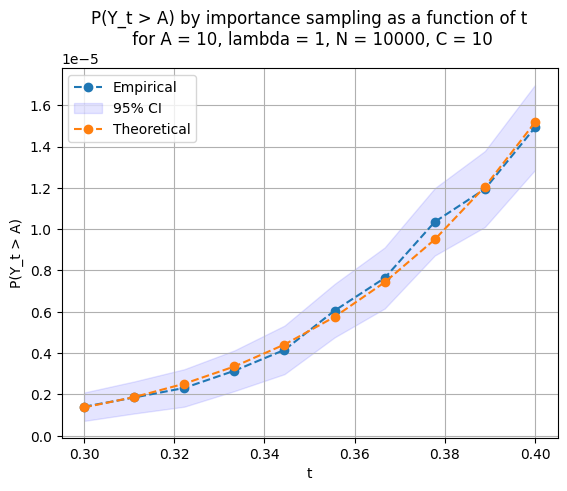

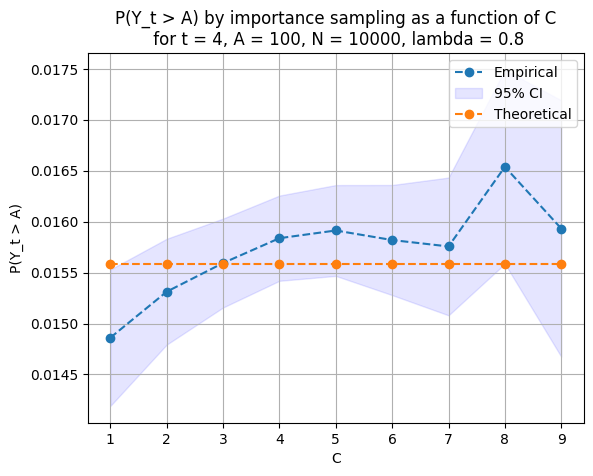

In [15]:
import src.Importance_Sampling_C as Importance_Sampling_C

### Plot as a function of t
lambda_ = 1
liste_t = np.linspace(0.3, 0.4, 10)
A = 10
C = 10
N = 10000

Importance_Sampling_C.plot_proba_importance_sampling_t(liste_t, A, C, lambda_, N)

# Plot as a function of C
t = 4
A = 100
lambda_ = 0.8
N = 10000
liste_C = np.arange(1, 10)

Importance_Sampling_C.plot_proba_importance_sampling_C(liste_C, t, A, lambda_, N)

- Empirically, taking $C = 5$ or $C = 6$ gives satisfactory results.


## 3. COMPUTATION OF $ P(Y_t > A) $ USING IMPORTANCE SAMPLING WITH CHANGE OF $ \lambda $.


$$
P(Y_t > A) = \mathbb{E}_\lambda[\mathbf{1}(Y_t > A)] \approx \frac{1}{N} \sum_{i=1}^N \mathbf{1}(Y_t^i > A) \left(\frac{1 - \exp(-\lambda t)}{1 - \exp(-\lambda' t)}\right)^{Y_t^i} \frac{\exp(-\lambda t)}{\exp(-\lambda' t)}
$$

where $Y_t^i$ are the samples drawn from the geometric distribution with parameter $q = \exp(-\lambda' t)$.


In [16]:
def theoretical_probability_less_than_A(lambda_, t, A):
    """ Theoretical calculation of P(Y_t < A | Y_0 = 1) using (B). """
    theoretical_probability = 0
    for k in range(1, A):
        theoretical_probability += np.exp(-lambda_*t) * (1 - np.exp(-lambda_*t))**(k - 1)
    return theoretical_probability

def theoretical_probability_greater_than_A(t, A, lambda_):
    """ Calculation of P(Y_t > A | Y_0 = 1) using (B). """
    probability = 1 - theoretical_probability_less_than_A(lambda_, t, A)
    probability -= np.exp(-lambda_*t) * (1 - np.exp(-lambda_*t))**(A - 1)
    return probability

def proba_yule_sup_IS(lambda_, lambda_prime, A, t, N):
    """
    Estimates P(Y_t > A) for a Yule process using importance sampling.
    Measure change: a Poisson process with parameter lambda_prime is used to generate the samples.
    """    
    proba_estimee = 0
    liste_poids = []
    for i in range(N) :
        Y_t = Y_t_1(t, lambda_prime, 1) 
        if Y_t > A:
            poids = ((1 - np.exp(-lambda_ * t)) / (1 - np.exp(-lambda_prime * t))) ** (Y_t - 1)
            proba_estimee += poids
            liste_poids.append(poids)
    proba_estimee *= np.exp(t * (lambda_prime - lambda_)) 
    proba_estimee /= N
    return proba_estimee, liste_poids


def plot_proba_yule_sup(lambda_, liste_lambda_prime, A, t, N):
    """
    Plots P(Y_t > A) calculated by IS as a function of lambda_prime.
    """
    liste_proba_yule = [proba_yule_sup_IS(lambda_, lambda_prime, A, t, N) for lambda_prime in liste_lambda_prime]
    liste_proba = [proba_yule[0] for proba_yule in liste_proba_yule]
    liste_liste_poids = [proba_yule[1] for proba_yule in liste_proba_yule]
    
    liste_std = [np.std(liste_poids) for liste_poids in liste_liste_poids]
    liste_erreur_95 = [1.96 * std / np.sqrt(N) for std in liste_std]
    
    proba_theorique = theoretical_probability_greater_than_A(t, A, lambda_)
    
    # Displaying the estimated probability and the theoretical probability
    plt.plot(liste_lambda_prime, liste_proba, label = "Estimated probability", marker='o', linestyle='--') 
    plt.axhline(y=proba_theorique, color='r', linestyle='--', label = "Theoretical probability")
    
    # Displaying the errors
    plt.fill_between(liste_lambda_prime, [max(0, proba - erreur) for proba, erreur in zip(liste_proba, liste_erreur_95)], [proba + erreur for proba, erreur in zip(liste_proba, liste_erreur_95)], color='b', alpha=.1, label = "95% CI")
    
    plt.legend()
    plt.xlabel("lambda_prime")
    plt.ylabel("Estimated Probability")
    plt.title("P(Y_t > A) calculated by IS as a function of lambda_prime\n for t = {}, lambda = {}, A = {}, N = {}".format(t, lambda_, A, N))
    plt.show()
    
    return liste_proba

## 5. IMPORTANCE SAMPLING FOR COMPUTING $ P(Y_t < A) $


Suppose we want to estimate the probability that $ Y_t \leq A $ for a random variable $ Y_t $ following a geometric distribution with parameter $ \exp(-\lambda t)$. We use importance sampling with a geometric importance distribution with parameter $ \exp(-\lambda' t)$.

### Importance Sampling Formula

We replace $ f(x) $ by $ \mathbf{1}(Y_t \leq A) $, an indicator function that equals 1 if $ Y_t \leq A $ and 0 otherwise. The probability can be estimated by:

$$
\mathbb{E}_p[\mathbf{1}(Y_t < A)] \approx \frac{1}{N} \sum_{i=1}^N \mathbf{1}(Y_t^i < A) \frac{p(Y_t^i)}{q(Y_t^i)}
$$

### Importance Weights

The importance weights are given by:

$$
\frac{p(Y_t)}{q(Y_t)} = \frac{\left(1 - \exp(-\lambda t)\right)^{Y_t} \exp(-\lambda t)}{\left(1 - \exp(-\lambda' t)\right)^{Y_t} \exp(-\lambda' t)}
$$

which simplifies to:

$$
\frac{p(Y_t)}{q(Y_t)} = \left(\frac{1 - \exp(-\lambda t)}{1 - \exp(-\lambda' t)}\right)^{Y_t} \frac{\exp(-\lambda t)}{\exp(-\lambda' t)}
$$

### Final Estimator

By substituting the importance weights into the estimator, we obtain:

$$
\mathbb{E}_p[\mathbf{1}(Y_t < A)] \approx \frac{1}{N} \sum_{i=1}^N \mathbf{1}(Y_t^i < A) \left(\frac{1 - \exp(-\lambda t)}{1 - \exp(-\lambda' t)}\right)^{Y_t^i} \frac{\exp(-\lambda t)}{\exp(-\lambda' t)}
$$

Where $ Y_t^i $ are the samples drawn from the geometric distribution with parameter $ q = \exp(-\lambda' t) $.


In [17]:
### Calculation of P(Y_t < A) by importance sampling

def proba_yule_inf_IS(lambda_, lambda_prime, A, t, N):
    """
    Estimates P(Y_t < A) for a Yule process using importance sampling.
    Measure change: a Poisson process with parameter lambda_prime is used to generate the samples.
    """    
    proba_estimee = 0
    liste_poids = []
    for _ in range(N):
        Y_t = Y_t_1(t, lambda_prime, 1) 
        poids = (( 1 - np.exp(-lambda_ * t))/(1 - np.exp(-lambda_prime * t)))**(Y_t - 1)
        if Y_t < A:
            proba_estimee += poids
            liste_poids.append(poids)
        else : 
            liste_poids.append(0)
    proba_estimee *= np.exp(t*(lambda_prime - lambda_)) 
    proba_estimee /= N
    liste_poids = np.array(liste_poids, dtype = np.float64)
    liste_poids *= np.exp(t*(lambda_prime - lambda_)) 
    return proba_estimee, liste_poids


def plot_proba_yule_inf(lambda_, liste_lambda_prime, A, t, N):
    """
    Plots P(Y_t < A) as a function of lambda_prime.
    """
    # Estimating the probability
    liste_yule = [proba_yule_inf_IS(lambda_, lambda_prime, A, t, N) for lambda_prime in liste_lambda_prime]
    liste_proba = [yule[0] for yule in liste_yule]
    liste_liste_poids = [yule[1] for yule in liste_yule]
    
    liste_std = [np.std(liste_poids) for liste_poids in liste_liste_poids]
    liste_erreur_95 = [1.96 * std / np.sqrt(N) for std in liste_std]
    
    proba_theorique = theoretical_probability_less_than_A(lambda_, t, A)

    # Displaying the estimated probability and the theoretical probability
    plt.plot(liste_lambda_prime, liste_proba, label="Estimated probability", marker='o', linestyle='--')
    plt.axhline(y=proba_theorique, color='r', linestyle='--', label="Theoretical probability")
    
    # Displaying the errors
    plt.fill_between(liste_lambda_prime, [max(0, proba - erreur) for proba, erreur in zip(liste_proba, liste_erreur_95)], [proba + erreur for proba, erreur in zip(liste_proba, liste_erreur_95)], color='b', alpha=.1, label="95% CI")
    
    plt.legend()
    plt.xlabel("lambda_prime")
    plt.ylabel("Estimated probability")
    plt.title("P(Y_t < A) calculated by IS\n for t = {}, lambda = {}, A = {}, N = {}".format(t, lambda_, A, N))
    plt.ylim(0, 10 * proba_theorique)
    plt.show()
    
    return liste_proba

- We take $ \lambda > 1 $ to be in the case of rare events.
- Choose $ \lambda' \leq 1 $ for the importance sampling to be effective.
- Idea: take $ \lambda' $ increasing with $ A $.


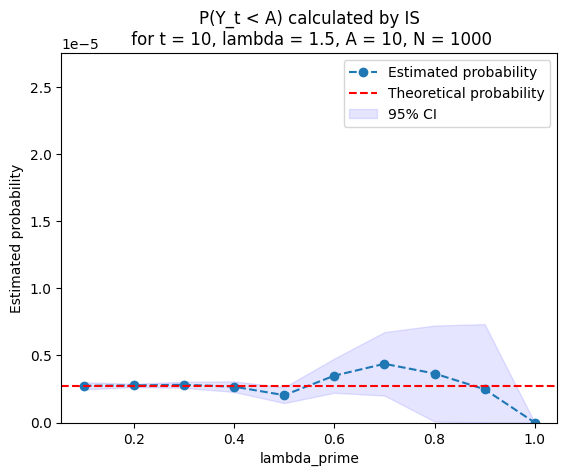

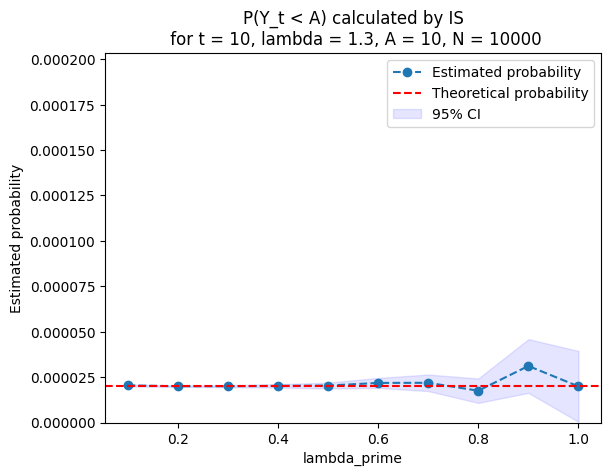

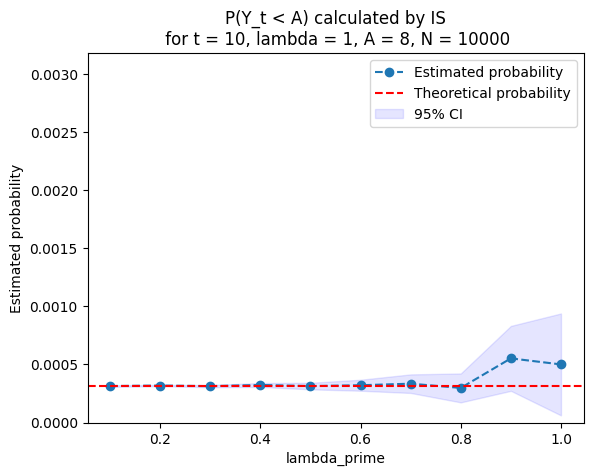

In [18]:
# TEST 1
A = 10  # Threshold A
N = 1000 # Number of samples
lambda_ = 1.5 # Birth rate 
t = 10  # Time t
liste_lambda_prime = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) # Values of lambda_prime to test

liste_proba = plot_proba_yule_inf(lambda_, liste_lambda_prime, A, t, N)

# TEST 2
A = 10  
N = 10000 
lambda_ =  1.3 
t = 10  
liste_lambda_prime = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) 

liste_proba = plot_proba_yule_inf(lambda_, liste_lambda_prime, A, t, N)

# TEST 3
A = 8  
N = 10000 
lambda_ = 1 
t = 10  
liste_lambda_prime = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) 

liste_proba = plot_proba_yule_inf(lambda_, liste_lambda_prime, A, t, N)

## COMPUTATION OF $P(Y_T < A)$ USING SPLITTING

In [19]:
def monte_carlo_simulation(lambda_, t, A, N, a, mode): 
    """
    Helper function to estimate P(Y_ti </>/= a | Y_ti-1 = a) using naive Monte Carlo.
    """
    count = 0
    for _ in range(N):
        Y_t = Y_t_1(lambda_, t, a)
        if mode == "lt":  # Mode: less than
            if Y_t < A:
                count += 1
        elif mode == "eq":  # Mode: equal
            if Y_t == A:
                count += 1
        elif mode == "gt":  # Mode: greater than
            if Y_t > A:
                count += 1
    proba = count / N
    std = np.sqrt(proba * (1 - proba) / N)
    z_score = sps.norm.ppf(0.975)
    confidence_interval = (proba - z_score * std, proba + z_score * std)
    return proba, confidence_interval

def Splitting(lambda_, t, I, N, A):
    """
    Computes P(Y_t < A) using the splitting method for the Yule process Y_t.
    """
    split_times = np.linspace(0, t, I + 1)  # List of split times
    memo = np.zeros((len(split_times), A + 1))  # Memory to store probabilities P(Y_t = a)
    memo[0][1] = 1
    conditional_probabilities = np.zeros(len(split_times) - 1)  # Conditional splitting probabilities
    uncertainties = np.zeros(len(split_times) - 1)  # Associated uncertainties
    
    for i in range(1, len(split_times)):
        num = 0
        denom = 0
        for a in range(1, A):
            num += monte_carlo_simulation(lambda_, split_times[i] - split_times[i-1], A, N, a, "lt")[0] * memo[int(split_times[i-1])][a]
            denom += memo[int(split_times[i-1])][a]
        p = num / denom
        conditional_probabilities[i - 1] = p
        for a in range(1, A + 1):
            for l in range(1, a + 1):
                e = monte_carlo_simulation(lambda_, split_times[i] - split_times[i-1], a, N, l, "eq")[0]
                memo[int(split_times[i])][a] += e * memo[int(split_times[i-1])][l]
                
    total_probability = np.prod(conditional_probabilities)
    return total_probability

def plot_Splitting(lambda_list, t, I, N, A):
    """
    Plots P(Y_t < A) using Splitting as a function of lambda, including theoretical values.
    """
    probabilities = []
    theoretical_probabilities = []
    for lambda_ in lambda_list:
        prob = Splitting(lambda_, t, I, N, A)
        probabilities.append(prob)
        theoretical_probabilities.append(theoretical_probability_less_than_A(lambda_, t, A))
        
    plt.plot(lambda_list, probabilities, label="Splitting")
    plt.plot(lambda_list, theoretical_probabilities, label="Theoretical")
    plt.xlabel("lambda")
    plt.ylabel("P(Y_t < A)")
    plt.title(f"P(Y_t < A) using Splitting as a function of lambda \n for t = {t}, I = {I}, N = {N}, A = {A}")
    plt.grid()
    plt.legend()
    plt.show()


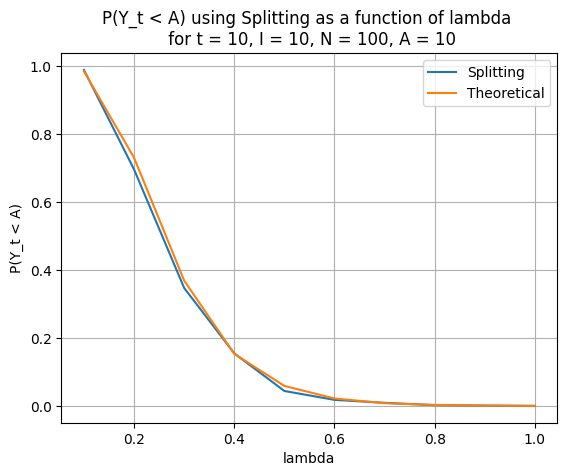

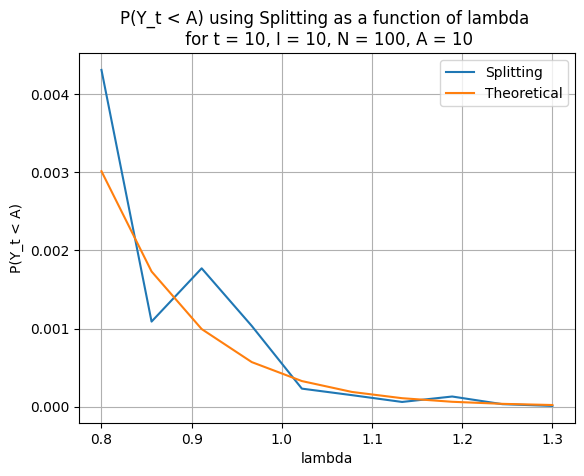

Increasing the number of simulations N by a factor of 10


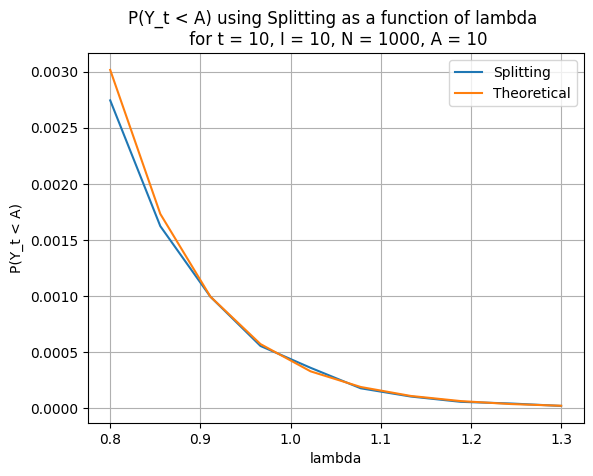

In [20]:
# TEST 1
# Case: Non-rare event
lambda_list = np.linspace(0.1, 1, 10)
t = 10
I = 10
N = 100
A = 10
plot_Splitting(lambda_list, t, I, N, A)

# TEST 2
# Case: Rare event
lambda_list = np.linspace(0.8, 1.3, 10)
t = 10
I = 10
N = 100
A = 10
plot_Splitting(lambda_list, t, I, N, A)

# TEST 3
# Case: Rare event
lambda_list = np.linspace(0.8, 1.3, 10)
t = 10
I = 10
N = 1000
A = 10
print("Increasing the number of simulations N by a factor of 10")
plot_Splitting(lambda_list, t, I, N, A)

(D) As $t \rightarrow \infty$, $Y_{t} \cdot e^{-\lambda t}$ almost surely converges to a random variable denoted $E$, called the terminal value of the Yule process $\left(Y_{t}\right)_{t \geq 0}$. It turns out that $E$ follows an exponential distribution with parameter 1.



### Illustration of the Convergence of Point (D) Through Simulations

In [21]:
def conv_loi(lambda_, N, t):
    """ Function to verify the convergence of the distribution of Y_t * exp(-lambda_ * t) to an exponential distribution with parameter 1 """
    Y_t_exp_values = [Y_t_1(t, lambda_, 1) * np.exp(-lambda_ * t) for _ in range(N)]

    # Plotting the histogram of the values of Y_t * exp(-lambda_ * t)
    plt.figure(figsize=(10, 6))
    plt.hist(Y_t_exp_values, bins=100, density=True, alpha=0.7, label='Empirical distribution')

    # Plotting the theoretical exponential distribution with parameter 1
    x = np.linspace(0, 10, 1000)
    y = np.exp(-x)
    plt.plot(x, y, color='red', linestyle='dashed', label='Exponential distribution (parameter 1)')

    plt.xlabel('Value of Yt * exp(-λt)')
    plt.ylabel('Probability density')
    plt.title("Comparison of the empirical distribution of Y_t * exp(-lambda_ * t) \n with Exp(1) distribution at t = {}, lambda_ = {}, N = {}".format(t, lambda_, N))
    plt.legend()
    plt.grid(True)
    plt.show()

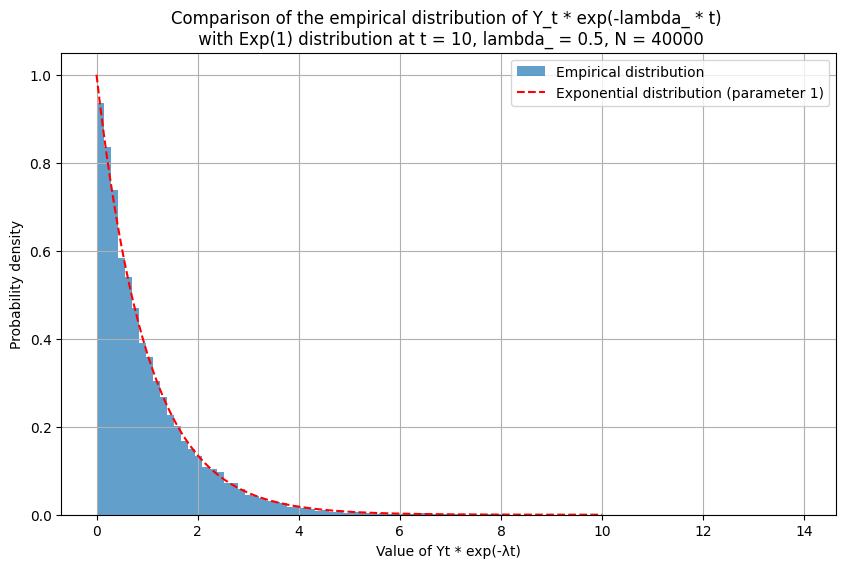

In [22]:
# TEST
lambda_ = 0.5
N = 40000
t = 10

conv_loi(lambda_, N, t)

# Predator/Birth Model

In this section, we assume that the population can move spatially and is hunted by predators. Here is a simplified model:

- Each site in $\mathbb{N}=\{0,1,2, \ldots\}$ is occupied by either a single prey, a single predator, or is empty.
- At time $t=0$, a predator occupies site 0, a prey occupies site 1, and all other sites are empty.
- If a prey is adjacent to an empty site, after a random time, independent of everything else, distributed according to an exponential random variable with parameter $\lambda$, it gives birth (without dying) to a new prey which occupies the empty site.
- If a predator is adjacent to a prey, after a random time, independent of everything else, distributed according to an exponential random variable with parameter 1, it gives birth to a new predator that occupies the site of the prey.

Let $p(\lambda)$ denote the probability that the prey population disappears. It can be shown that $p(\lambda) = 0$ for $\lambda \leq 1$ and $p(\lambda) > 0$ for $\lambda > 1$.

An effective tool for studying this model is the process $\left(S_{n}: n \geq 0\right)$, where $S_{n}$ is the number of prey after $n$ births (either of prey or predators). Thus, $S_{0} = 1$, and the prey population disappears if there exists a random integer $k$ such that $S_{k} = 0$. We can verify that $\left(S_{n}: n \geq 0\right)$ is a random walk for which we will calculate the jump distribution.


$$
\boxed{p(\lambda) = 
\begin{cases} 
1 & \text{si } \lambda \leq 1 \\
\frac{1}{\lambda} & \text{si } \lambda > 1 
\end{cases}}
$$

### Plot of $\lambda \mapsto p(\lambda)$ for $\lambda > 1$, and numerical study of the function.

When $\lambda > 1$, the event "the prey do not disappear" can be approximated by the event "there are at least $k$ prey at some moment," with an error of $\frac{\lambda-1}{\lambda^{k+1}-1}$ on $p(\lambda)$.

In [23]:
def p_lambda_theorique(lambda_):
    """ p = P(exp(1) > exp(lambda_)). Theoretical value valid for all lambda > 0"""
    if lambda_ <= 1:
        return 1
    else:
        return 1 / lambda_

@numba.jit()
def TEST_DISPARITION_PROIE(lambda_, k): 
    """
    Parameters:
    lambda_ (float): The reproduction rate of the prey.
    k (int): The maximum number of prey.
    Returns:
    bool: Returns False if prey remain, True otherwise.
    """
    S_n = 1
    # N = time
    while S_n > 0 and S_n < k:
        a = np.random.exponential(1, 1)
        b = np.random.exponential(1 / lambda_, 1)
        if a < b:
            S_n -= 1
        else:
            S_n += 1
    if S_n == 0:
        return True
    else:
        return False  # S_n == k

@numba.jit()
def p_lambda_numerique(lambda_, k, N):
    """ Compute p(lambda, k) using naive Monte Carlo
    """
    count = 0
    for _ in range(N):
        if TEST_DISPARITION_PROIE(lambda_, k):
            count += 1
    return count / N

def erreur_p(lambda_, k):
    return (lambda_ - 1) / (lambda_**(k + 1) - 1)

def plot_proba_disparition_lambda_sup_1(k, N, liste_lambda):
    """
    Plot the probability of prey extinction as a function of lambda.
    """
    proba_lambda = [p_lambda_numerique(lambda_, k, N) for lambda_ in liste_lambda]
    p_lambda_th = [p_lambda_theorique(lambda_) for lambda_ in liste_lambda]
    p_lambda_biased = [p_lambda_theorique(lambda_) - erreur_p(lambda_, k) for lambda_ in liste_lambda]
    
    # Plot theoretical and biased values of p(lambda)
    plt.plot(liste_lambda, p_lambda_th, marker='o', markersize=3, label='p(lambda) theoretical', color='red')
    plt.plot(liste_lambda, p_lambda_biased, marker='o', markersize=3, label='p(lambda) biased', color='blue')

    # Plot empirical values of p(lambda)
    plt.plot(liste_lambda, proba_lambda, marker='o', markersize=3, label='p(lambda) empirical', color='green')
    
    plt.xlabel('Lambda value')
    plt.ylabel('p(lambda)')
    plt.title('p(lambda) as a function of lambda for k = {}, N = {}'.format(k, N))
    plt.legend()
    plt.grid(True)
    
    plt.show()

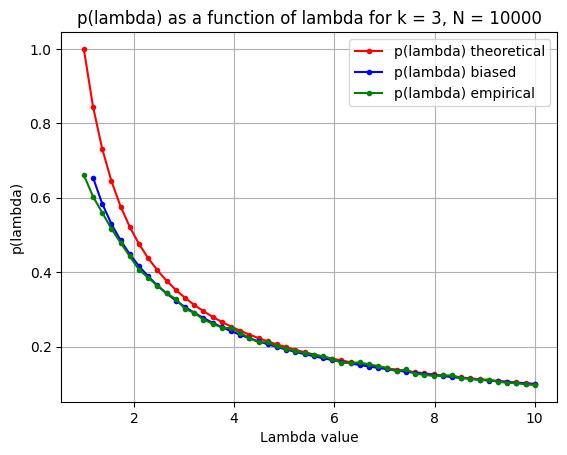

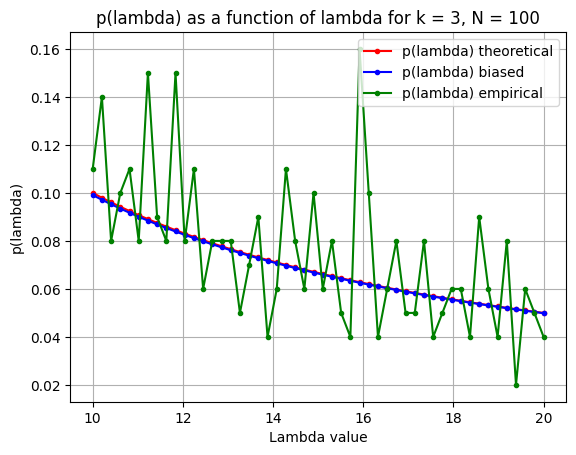

In [24]:
# Display for lambda > 1

# TEST 1
k = 3
N = 10000
liste_lambda = np.linspace(1, 10, 50)

plot_proba_disparition_lambda_sup_1(k, N, liste_lambda)

# TEST 4
k = 3
N = 100
liste_lambda = np.linspace(10, 20, 50)

plot_proba_disparition_lambda_sup_1(k, N, liste_lambda)

In [25]:
def plot_proba_disparition_lambda(k, N, liste_lambda):
    """
    Displays the probability of prey extinction as a function of lambda.
    """
    proba_lambda = [p_lambda_numerique(lambda_, k, N) for lambda_ in liste_lambda]
    p_lambda_th = [p_lambda_theorique(lambda_) for lambda_ in liste_lambda]
    
    # Plot theoretical values and empirical probabilities of p(lambda)
    plt.plot(liste_lambda, p_lambda_th, marker='o', markersize=3, label='Theoretical p(lambda)', color='red')
    plt.plot(liste_lambda, proba_lambda, marker='o', markersize=3, label='Empirical p(lambda)', color='green')
    
    plt.xlabel('Lambda value')
    plt.ylabel('p(lambda)')
    plt.title('p(lambda) as a function of lambda for k = {}, N = {}'.format(k, N))
    plt.legend()
    plt.grid(True)
    
    plt.show()
    
def p_prime(lambda_):
    if lambda_ <= 1:
        return 0
    else:
        return -1 / lambda_**2

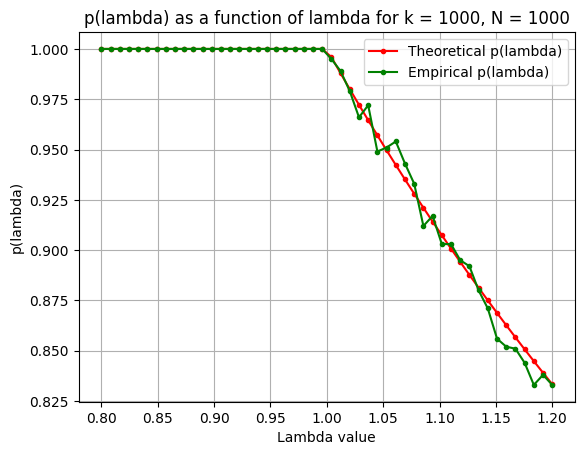

In [26]:
# TEST 1
k = 1000
N = 1000
liste_lambda = np.linspace(0.8, 1.2, 50)

plot_proba_disparition_lambda(k, N, liste_lambda)

In [27]:
### Display of Numerical and Theoretical Derivatives
def p_prime_theoretical(lambda_):
    if lambda_ <= 1:
        return 0
    else:
        return -1 / lambda_**2

def right_derivative_approximation_first_order(data_x, data_y):
    """Compute a first-order derivative."""
    n = len(data_x)
    data_y_prime = np.zeros(n)
    for i in range(n - 1):
        data_y_prime[i] = (data_y[i + 1] - data_y[i]) / (data_x[i + 1] - data_x[i])
    data_y_prime[n - 1] = data_y_prime[n - 2]
    return data_y_prime    

def right_derivative_approximation_second_order(data_x, data_y):
    """Compute a second-order derivative."""
    n = len(data_x)
    data_y_prime = np.zeros(n)
    for i in range(1, n - 1):
        h = data_x[i + 1] - data_x[i]
        data_y_prime[i] = (data_y[i + 1] - data_y[i - 1]) / (2 * h)
    data_y_prime[0] = data_y_prime[1]  # Forward difference for the first point
    data_y_prime[n - 1] = data_y_prime[n - 2]  # Backward difference for the last point
    return data_y_prime

def plot_p_prime_lambda(k, N, lambda_list):
    """
    Plot the derivative of the extinction probability as a function of lambda.
    """
    p_lambda_numerical = [p_lambda_numerique(lambda_, k, N) for lambda_ in lambda_list]
    p_prime_first_order = right_derivative_approximation_first_order(lambda_list, p_lambda_numerical)
    p_prime_second_order = right_derivative_approximation_second_order(lambda_list, p_lambda_numerical)
    p_lambda_prime_theoretical = [p_prime_theoretical(lambda_) for lambda_ in lambda_list]
    
    # Plot theoretical and numerical derivatives of p(lambda)
    plt.plot(lambda_list, p_lambda_prime_theoretical, marker='o', markersize=3, label="Theoretical p'(lambda)", color='blue')
    plt.plot(lambda_list, p_prime_first_order, marker='o', markersize=3, label="Numerical p'(lambda) (First Order)", color='red')
    plt.plot(lambda_list, p_prime_second_order, marker='o', markersize=3, label="Numerical p'(lambda) (Second Order)", color='green')
    
    plt.xlabel('Value of lambda')
    plt.ylabel("p'(lambda)")
    plt.title("p'(lambda) as a function of lambda for k = {}, N = {}".format(k, N))
    plt.legend()
    plt.grid(True)
    plt.show()

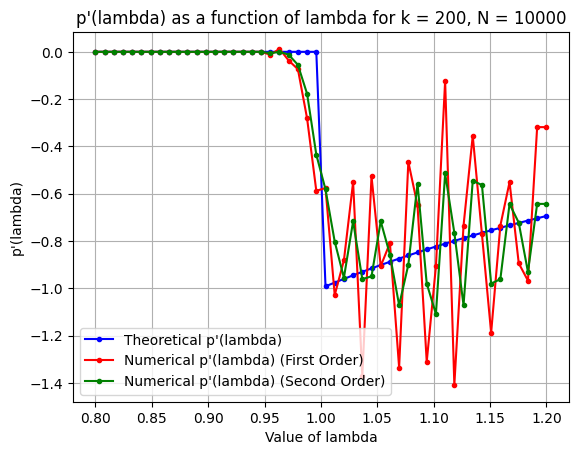

In [28]:
# TEST plot_p_prime_lambda
k = 200
N = 10000
lambda_list = np.linspace(0.8, 1.2, 50)

plot_p_prime_lambda(k, N, lambda_list)

- $p(\lambda)$ is not differentiable a priori at 1.
- We refine the method to compute a numerical approximation of the derivative of $p(\lambda)$ at $1_{+}$ and $1_{-}$.


In [29]:
def derivative_stats(data_x, data_y):
    n = len(data_x)
    data_y_prime = np.zeros(n)
    for i in range(1, n-1):
        h = data_x[i+1] - data_x[i]
        data_y_prime[i] = (data_y[i+1] - data_y[i-1]) / (2*h)
    data_y_prime[0] = data_y_prime[1]  # Forward difference for the first point
    data_y_prime[n-1] = data_y_prime[n-2]  # Backward difference for the last point

    mean_derivative = np.mean(data_y_prime)
    std_derivative = np.std(data_y_prime)

    return mean_derivative, std_derivative

We calculate the average of the derivatives from the left and the right for a better approximation

In [30]:
# TEST 1 for lambda < 1 (left)
k = 200
N = 10000
liste_lambda = np.linspace(0.9, 1, 30)

p_lambda_inf_1 = [p_lambda_numerique(lambda_, k, N) for lambda_ in liste_lambda]
mean_derivative, std_derivative = derivative_stats(liste_lambda, p_lambda_inf_1)
print("For lambda < 1, mean_derivative = ", mean_derivative, "std_derivative = ", std_derivative)

# TEST 2 for lambda > 1 (right)
k = 200
N = 10000
liste_lambda = np.linspace(1, 1.1, 30)

p_lambda_sup_1 = [p_lambda_numerique(lambda_, k, N) for lambda_ in liste_lambda]
mean_derivative, std_derivative = derivative_stats(liste_lambda, p_lambda_sup_1)
print("For lambda > 1, mean_derivative = ", mean_derivative, "std_derivative = ", std_derivative)

For lambda < 1, mean_derivative =  -0.05655000000000006 std_derivative =  0.12064081329854155
For lambda > 1, mean_derivative =  -0.8545333333333307 std_derivative =  0.374462012611284


The simulation shows that $p(\lambda)$ is clearly not differentiable at 1. This is consistent with the theoretical value of $p(\lambda)$.


## Computation of $A_{n}(\lambda)$

### Let $A_{n}(\lambda)$ be the probability that there are at least $n$ prey at some moment.

Let's estimate $A_{n}(\lambda)$ for some values of $n$ and $\lambda < 1$ in the rare event regime. 

The theoretical value of $A_n$ is given by the following formula:

$$
\boxed{A_n(\lambda) = \frac{1 - \frac{1 - p}{p}}{1 - \left(\frac{1 - p}{p}\right)^n}}
$$

$$p = \frac{\lambda}{1 + \lambda}$$


We propose two methods to compute $A_n(\lambda)$

In [31]:
def theoretical_value_An(lambda_, n):
    p = lambda_ / (1 + lambda_)
    return (1 - (1 - p) / p) / (1 - ((1 - p) / p) ** n)

@numba.njit()
def calculate_A_n_lambdaV1(lambda_1, lambda_2, T, n, N):
    p_1 = float(lambda_1 / (1.0 + lambda_1))  # Probability that Exp(lambda_1) > Exp(1)
    p_2 = float(lambda_2 / (1.0 + lambda_2))  # Probability that Exp(lambda_2) > Exp(1)
    coeff_1 = p_1 / p_2
    coeff_2 = ((1 - p_1) / (1 - p_2))
    probability = 0.0
    weight_list = []
    random_numbers = np.random.binomial(1, p_2, (N, T))

    for i in range(N):
        num_prey = 1
        M = 1.0
        for j in range(T):
            X_i = random_numbers[i, j]
            num_prey += (2 * X_i - 1)

            if X_i == 1:
                M *= coeff_1
            else:
                M *= coeff_2

            if num_prey >= n:
                probability += M
                weight_list.append(M)
                break

            if num_prey <= 0:
                break

    probability /= N
    weight_list = np.array(weight_list)
    return probability, weight_list

@numba.njit()
def calculate_A_n_lambdaV2(lambda_1, lambda_2, n, N):
    """ """
    p_1 = float(lambda_1 / (1.0 + lambda_1))  # Probability that Exp(lambda_1) > Exp(1)
    p_2 = float(lambda_2 / (1.0 + lambda_2))  # Probability that Exp(lambda_2) > Exp(1)
    coeff_1 = p_1 / p_2
    coeff_2 = ((1 - p_1) / (1 - p_2))
    probability = 0.0
    weight_list = []

    batch_size = 10000000  # size of a batch of random variables to save time
    batch_i = batch_size  # index of the next random variable in the batch (= batch_size means creating a new batch)

    for i in range(N):
        num_prey = 1
        M = 1.0
        while True:
            if batch_i >= batch_size:
                # Remove a batch of random variables
                random_numbers = np.random.binomial(1, p_2, batch_size)
                batch_i = 0  # reinitialize the index

            X_i = random_numbers[batch_i]
            batch_i += 1
            num_prey += (2 * X_i - 1)

            if X_i == 1:
                M *= coeff_1
            else:
                M *= coeff_2

            if num_prey >= n:
                probability += M
                weight_list.append(M)
                break

            if num_prey <= 0:
                break

    probability /= N
    weight_list = np.array(weight_list)
    return probability, weight_list

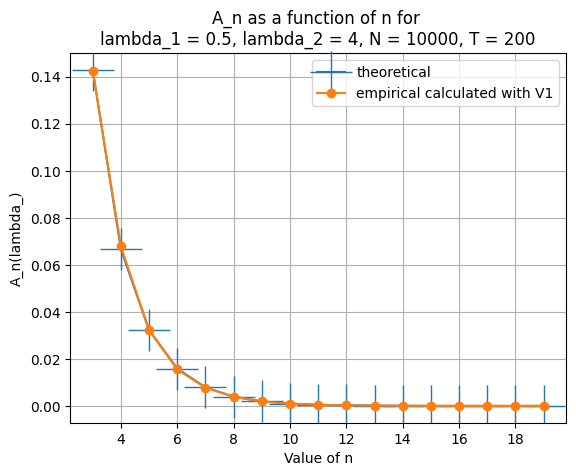

In [32]:
def An_lambda_fixed(lambda_1, lambda_2, liste_n, N, T):
    """ Calculate A_n(lambda) for fixed lambda_1 and lambda_2 and different values of n """
    proba_theorique = [theoretical_value_An(lambda_1, n) for n in liste_n]
    plt.plot(liste_n, proba_theorique, marker='+', label='theoretical', markersize=30)
    
    proba_empirique = [calculate_A_n_lambdaV1(lambda_1, lambda_2, T, n, N)[0] for n in liste_n]
    plt.plot(liste_n, proba_empirique, marker='o', label='empirical calculated with V1', linestyle='-')
    
    plt.xlabel('Value of n')
    plt.ylabel('A_n(lambda_)')
    plt.title('A_n as a function of n for \nlambda_1 = {}, lambda_2 = {}, N = {}, T = {}'.format(lambda_1, lambda_2, N, T))
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
    
An_lambda_fixed(0.5, 4, np.arange(3, 20), 10000, 200)

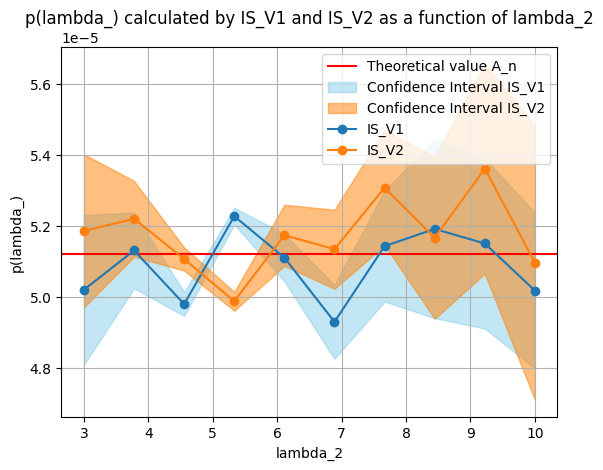

In [33]:
import src.Plot_An as Plot_An

### COMPARISON OF V2 AND V3 ###
N = 1000
T = 100
n, lambda_1 = 7, 0.2
liste_lambda_2 = np.linspace(3, 10, 10)

proba_V2, proba_V3 = Plot_An.plot_proba_function_of_lambda_V1_V2(lambda_1, liste_lambda_2, T, n, N)

- Empirically, we see that we can take any $\lambda_2$ as long as it is > 1 and far from 1.


### How to select $T$:

Let $X_i$ be a random variable taking values in $\{0, 1\}$.

Define $U_i = 2X_i - 1$, which takes values in $\{-1, 1\}$.

We set $S_t = 1 + 2\sum_{i=1}^{t} X_i - t = \sum_{i=1}^{t} U_i + 1$, representing the number of prey at time $t$.

We aim to calculate $A_n = P(\exists t \in \mathbb{N}, S_t = n)$ for a fixed $n$.

We know how to compute $A_n(T) = P(\exists t \in [0, T], S_t = n)$ for a fixed $T$. The increasing limit is given by:
$$
\lim_{T \to +\infty} A_n(T) = A_n.
$$

The method for computation in the rare event regime is importance sampling by changing the parameter $\lambda$ of the random walk. This involves using the following function:
$$
h_T = 1_{\{\exists t \in [0, T], S_t = n\}}.
$$

We simulate a biased process with $k = n$ and a fixed time limit $T$.

It is necessary to choose the correct parameter change, i.e., the appropriate $\lambda_2$. More importantly, $T$ must be chosen so that the approximation $A_n(T)$ of $A_n$ is accurate.

For a fixed $n$, we need a heuristic for selecting the value of $T$.

We consider processes starting at 1 and evolving within $[0, k]$. These processes stop if either 0 or $k$ is reached. We are particularly interested in the stopping times of these random walks.

In [34]:
@numba.jit()
def TEST_PREY_EXTINCTION_V2(lambda_, n):
    """ Returns True if the prey disappears, False otherwise. Also returns T, the number of steps before extinction or exceeding n. """

    number_of_prey = 1
    T = 0
    while (number_of_prey > 0 and number_of_prey < n):
        T += 1
        a = np.random.exponential(1, 1)
        b = np.random.exponential(1 / lambda_, 1)
        if a < b:
            number_of_prey -= 1
        else:
            number_of_prey += 1
    if (number_of_prey == 0):
        return True, T
    else:
        return False, T  # S_T == n
    
    
@numba.jit(nopython=True)
def estimator_T(lambda_, k, N):
    """ Estimation of the probability that the prey disappears before reaching k. Also returns the list of stopping times. """
    count = 0
    stopping_times_list = np.zeros(N, dtype=np.int32)
    for i in range(N):
        a, b = TEST_PREY_EXTINCTION_V2(lambda_, k)
        if not a:  # S_T == k
            count += 1
                # print("Stop_time with exceeding k =", b)
        # else :
            # print("Stop_time with extinction of the prey =", b)
        stopping_times_list[i] = b
    
    return count / N, stopping_times_list

In [35]:
# parameters
N = 100000
lambda_ = 0.95
k = 200

frequency, stopping_times_list = estimator_T(lambda_, k, N)

# displaying the mean + standard deviation of stopping_times_list
mean_b = np.mean(stopping_times_list)
std_dev_b = np.std(stopping_times_list)
max_b = np.max(stopping_times_list)

print('\n')
print("The mean of the stopping time is", mean_b)
print("The standard deviation of the stopping time is", std_dev_b, '\n')
print("The maximum stopping time is", max_b)



The mean of the stopping time is 38.71004
The standard deviation of the stopping time is 241.70746832317448 

The maximum stopping time is 11283


In [36]:
def plot_exceeding_frequency_k_square(lambda_, N, liste_k):
    liste_frequency = np.zeros(len(liste_k))
    for i, k_ in enumerate(liste_k):
        f, liste_b = estimator_T(lambda_, k_, N)
        
        # count the number of stopping times exceeding k**2
        count = np.sum(liste_b > k_**2)
        liste_frequency[i] = count / N
        
    plt.plot(liste_k, liste_frequency, marker='o', linestyle='-')
    plt.xlabel('Value of k')
    plt.ylabel('Frequency of exceeding k^2')
    plt.title('Frequency of exceeding k^2 \nas a function of k for a biased naive Monte Carlo by k')
    plt.grid(True)
    plt.show()

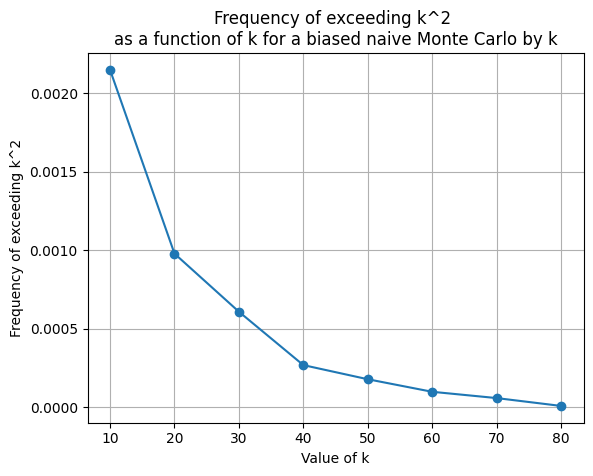

In [37]:
# parameters
N = 100_000
lambda_ = 0.95
liste_k = [10, 20, 30, 40, 50, 60, 70, 80]

plot_exceeding_frequency_k_square(lambda_, N, liste_k)

- The previous graph shows that taking $ T = O(n^2)$ is sufficient to achieve good accuracy in the calculation of IS V1 as well as for $ p(\lambda )$.


## Computation of $\tilde{A}_{n}(\lambda)$, defined as the probability that a prey reaches site $n$


The theoretical value of $\tilde{A_n}(\lambda)$ is given by the following formula:

$$
\boxed{\tilde{A_n}(\lambda) = \sum_{k=1}^{n-1} \left( \binom{2n - 3}{n - 2 + k} - \binom{2n - 3}{n + k -1} \right) p^{n-2+k}(1-p)^{n-1-k}}
$$

with $$ p = \frac{\lambda}{1 + \lambda}$$


In [38]:
def theoretical_value_An_tilde(lambda_, n):
    p = lambda_ / (1 + lambda_)
    sum_value = 0
    for k in range(1, n):
        binom1 = scipy.special.comb(2*n - 3, n - 2 + k)
        binom2 = scipy.special.comb(2*n - 3, n + k - 1)
        sum_value += (binom1 - binom2) * (p**(n-2+k)) * ((1-p)**(n-1-k))
    return 1 - sum_value

# model change 
@numba.jit()
def TEST_SITE_REACHED(lambda_, n):
    prey_count = 1 
    site_number = 1  # number of the furthest prey site
    N = 0  # number of steps
    while (prey_count > 0 and N < 2*n - 3 and prey_count < n):
        # If N = 2*n - 3, it implies there is necessarily one prey that has passed the site n.
        a = np.random.exponential(1, 1)
        b = np.random.exponential(1/lambda_, 1)
        if a < b:
            prey_count -= 1
        else:
            prey_count += 1
            site_number += 1
        N += 1
    if (prey_count == 0):
        return False, site_number  # we are dead before reaching the target site
    else:
        return True, site_number
    
@numba.jit()   
def empirical_An_tilde(lambda_, n, N):
    count = 0
    for i in range(N):
        if TEST_SITE_REACHED(lambda_, n)[0]:
            count += 1
    return 1 - count / N

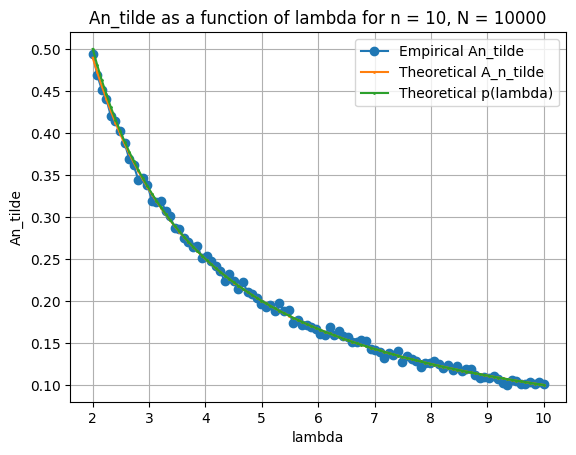

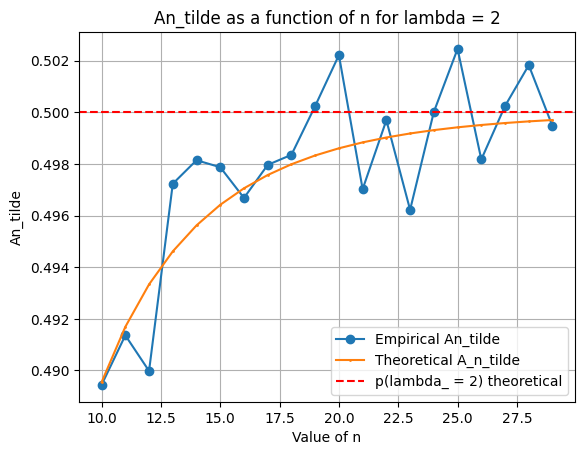

In [39]:
import src.Plot_An_tilde as Plot_An_tilde

### Display empirical An_tilde as a function of lambda
n = 10
N = 10000
lambda_list = np.linspace(2, 10, 100)

Plot_An_tilde.plot_An_tilde_fixed_n(lambda_list, n, N)

### Display empirical An_tilde as a function of n. lambda > 1
lambda_ = 2
N = 100000
k = 5
n_list = np.arange(10, 30)

Plot_An_tilde.plot_An_tilde_fixed_lambda(lambda_, n_list, N)

For fixed $\lambda$, $n \rightarrow \tilde{A}_n(\lambda)$ is decreasing. This is because if a prey reaches site $n+1$, it must have reached site $n$ beforehand. Let's formulate this more rigorously.

**Set Inclusion:**
- Consider $\tilde{B}_n(\lambda)$ as the event "a prey reaches site $n$". Therefore, we have $\mathbb{P}(\tilde{B}_n(\lambda)) = \tilde{A}_n(\lambda)$.
- If a prey reaches site $n+1$, then there must be a prey that has already reached site $n$.
- Therefore, $\tilde{B}_{n+1}(\lambda) \subseteq \tilde{B}_n(\lambda)$.
- In terms of probabilities, this implies $\tilde{A}_{n+1}(\lambda) \leq \tilde{A}_n(\lambda)$, hence the curve is decreasing.

**Proof:**

Suppose the prey survive. This implies an infinite number of births of prey.

- An infinite number of births of prey means that each site will eventually be reached by a prey.
- Therefore, if the prey survive, all sites will be reached.

**Limit Value:**

By plotting $\tilde{A}_n(\lambda)$ for increasing values of $n$, we observe that the curve tends towards a limit value.

- This limit value is the probability of the prey population's survival.
- Indeed, if the prey survive, there will be an infinite number of births of prey, and therefore all sites will be reached.
- The limit probability is consistent with the previous proof: 
$$
\lim_{n \to \infty} \tilde{A}_n(\lambda) = 1 - p(\lambda).
$$

**Conclusion:**

In summary, for fixed $\lambda$, $n \rightarrow \tilde{A}_n(\lambda)$ is decreasing. The curve tends towards a limit value, which is the probability of the prey population's survival, confirming that if the population survives, all sites will be reached.